In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from neuralnet import *
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
answer=pd.read_csv("gender_submission.csv")

## change the null in age data with the the median age

In [4]:
train_data.loc[train_data.Age.isnull(), 'Age'] = train_data.groupby("Pclass").Age.transform('median')
test_data.loc[test_data.Age.isnull(), 'Age'] = test_data.groupby("Pclass").Age.transform('median')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## The survival rate of different classes

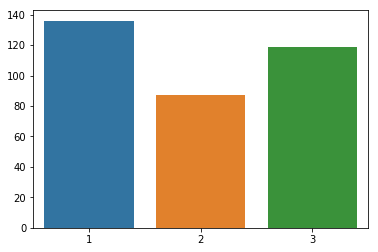

In [6]:
Survived = train_data[train_data['Survived']==1]
c1 = (Survived['Pclass']==1).sum()
c2= (Survived['Pclass']==2).sum()
c3 = (Survived['Pclass']==3).sum()
#plt.hist(x=[a,b,c])
sns.barplot(x=[1,2,3], y = [c1,c2,c3])

## The survival rate of different Sexes

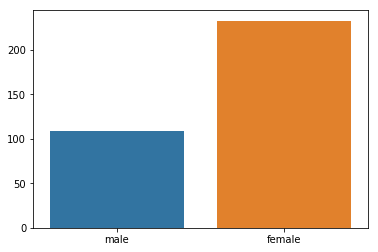

In [7]:
male = (Survived['Sex']=='male').sum()
female = (Survived['Sex']=='female').sum()
sns.barplot(x=['male', 'female'], y = [male, female])

## The survival rate of different Age

[]

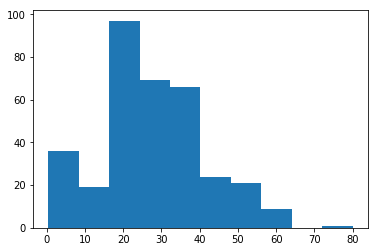

In [8]:
plt.hist(Survived['Age'])
plt.plot()

## The survival rate of different Fare

[]

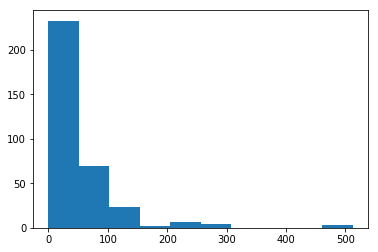

In [9]:
plt.hist(Survived['Fare'])
plt.plot()

## set x and y to train the data with

In [10]:
train_x=train_data.set_index('PassengerId') 

train_x=train_x.drop(['Name','Ticket','Cabin'], axis=1)

train_x=train_x.dropna()

train_y=pd.DataFrame(train_x.get('Survived'))

train_x=train_x.drop(['Survived'], axis=1)

train_x["Sex"]= train_x["Sex"].replace('male', 1).replace('female', 0)

train_x["Embarked"]= train_x["Embarked"].replace('S', 1).replace('C', 2).replace('Q', )

#x=x[pd.notnull(x["Age"])]
train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,1
2,1,0,38.0,1,0,71.2833,2
3,3,0,26.0,0,0,7.9250,1
4,1,0,35.0,1,0,53.1000,1
5,3,1,35.0,0,0,8.0500,1
6,3,1,24.0,0,0,8.4583,1
7,1,1,54.0,0,0,51.8625,1
8,3,1,2.0,3,1,21.0750,1
9,3,0,27.0,0,2,11.1333,1


In [11]:
test_x=test_data.set_index('PassengerId')

test_x=test_x.drop(['Name','Ticket','Cabin'], axis=1)

#test_data=test_data.dropna()

#test_x['Fare'] = test_x.Fare.round(2)
test_x["Sex"]= test_x["Sex"].replace('male', 1).replace('female', 0)
test_x["Embarked"]= test_x["Embarked"].replace('S', 1).replace('C', 2).replace('Q', 3)
test_x = test_x.fillna((test_x['Fare'].mean()))
test_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,3
893,3,0,47.0,1,0,7.0000,1
894,2,1,62.0,0,0,9.6875,3
895,3,1,27.0,0,0,8.6625,1
896,3,0,22.0,1,1,12.2875,1


In [12]:

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
train_x = pd.DataFrame(std_scaler.fit_transform(train_x), columns=train_x.columns, index= train_x.index)
test_x = pd.DataFrame(std_scaler.fit_transform(test_x), columns=test_x.columns, index= test_x.index)#.set_index(np.array(range(892,1310)))
test_x.head()

/Users/arminforoughi/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/arminforoughi/opt/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/arminforoughi/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/arminforoughi/opt/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,0.873482,0.755929,0.393048,-0.499470,-0.400248,-0.498407,2.243165
893,0.873482,-1.322876,1.356309,0.616992,-0.400248,-0.513274,-0.677841
894,-0.315819,0.755929,2.512223,-0.499470,-0.400248,-0.465088,2.243165
895,0.873482,0.755929,-0.184909,-0.499470,-0.400248,-0.483466,-0.677841
896,0.873482,-1.322876,-0.570214,0.616992,0.619896,-0.418471,-0.677841


# training in SVM

In [388]:
svc = svm.SVC()
svc.fit(train_x, train_y)
y = svc.predict(train_x)
print('accuracy to the training on svm')
Y_pred = model.predict(test_x)
(889 - np.abs(y - train_y['Survived']).sum()) / 889.

accuracy to the training on svm


0.8357705286839145

# training in DecisionTreeClassifier

In [389]:
#dataset = datasets.load_iris()
  
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
Y_pred = model.predict(test_x)
y = model.predict(train_x)
print('accuracy to the training on Decision Tree')
(889 - np.abs(y - train_y['Survived']).sum()) / 889.

accuracy to the training on Decision Tree


0.9820022497187851

## RandomForestClassifier

In [458]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
Y_pred = random_forest.predict(test_x)
random_forest.score(train_x, train_y)

/Users/arminforoughi/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9820022497187851

## KNeighborsClassifier

In [463]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(train_x, train_y)
Y_pred = knn.predict(test_x)
knn.score(train_x, train_y)

/Users/arminforoughi/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.8391451068616423

# training in 5 layer Neural Network
### This gave the most accuracy towards the test of 80

In [14]:
'''(0.745230078563412, 16, 18, 6)
(0.7519640852974186, 22, 46, 33)
(0.7586980920314254, 27, 36, 14)
43, 12, 6'''

layers_dims = [7, 25, 35, 40, 1]
parameters = L_layer_model(np.transpose(np.array(train_x)), np.transpose(np.array(train_y)),layers_dims, num_iterations = 400)
print('accuracy to the training on NN')
Y_pred = predict_test(np.transpose(np.array(test_x)), parameters).T
(891 - np.abs(pd.DataFrame((predict(np.transpose(np.array(train_x)), np.transpose(np.array(train_y)), parameters)).T)[0] - train_y.reset_index()['Survived']).sum())/891
#two_layer_model(train_x, train_y,layers_dims)

accuracy to the training on NN


0.8125701459034792

## trasnfer prediction to output

In [23]:
output=pd.DataFrame(data= {'Survived': Y_pred.T[0].astype(int), 'PassengerId': test_data['PassengerId']})

In [25]:
Y_pred.T[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [26]:
output.to_csv('my_submission.csv', index=False)

In [27]:
output#.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
